<a href="https://colab.research.google.com/github/ZiyueNie/19ma573ZiyueNie/blob/master/src/hw2_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ex.

Suppose that we wish to approximate the first derivative $u'(x)$ of a very smooth function with an error of only $O(h)^4$, where $h$ is the step size. Which difference approximation could we use?

We can use central difference 

$$\frac{8 u(x+\frac{h}{2})-8 u(x-\frac{h}{2})-u(x+h)+u(x-h)}{6h}$$
_Proof:_ 

Since we want to find a difference approximation which has convergence order 4, and the target function is the first derivative $u'(x)$. Then we can write down the Taylor series of $u(x+h),u(x-h),u(x+\frac{h}{2}),u(x-\frac{h}{2})$ , truncate them at $O(h^5)$. 

$$u(x+h)=u(x)+hu'(x)+\frac{h^2u''(x)}{2!}+\frac{h^3u^3(x)}{3!}+\frac{h^4u^4(x)}{4!}+O(h^5)$$
 $$u(x-h)=u(x)-hu'(x)+\frac{h^2u''(x)}{2!}-\frac{h^3u^3(x)}{3!}+\frac{h^4u^4(x)}{4!}+O(h^5)$$
 $$u(x+\frac{h}{2})=u(x)+\frac{h}{2}u'(x)+\frac{h^2u''(x)}{4\times2!}+\frac{h^3u^3(x)}{8\times3!}+\frac{h^4u^4(x)}{16\times4!}+O(h^5)$$
$$u(x-\frac{h}{2})=u(x)-\frac{h}{2}u'(x)+\frac{h^2u''(x)}{4\times2!}-\frac{h^3u^3(x)}{8\times3!}+\frac{h^4u^4(x)}{16\times4!}+O(h^5)$$ 

 By calculation, we can get  
$$u(x+h)-u(x-h)=2hu'(x)+2\frac{h^3u^3(x)}{3!}+O(h^5)\qquad  (1)$$
$$u(x+\frac{h}{2})-u(x-\frac{h}{2})=hu'(x)+\frac{h^3u^3(x)}{4\times3!}+O(h^5)\qquad (2)$$


In order to cancel out $h^3u^3(x)$ terms, multiply (2) by 8, then let (2) - (1), we can get
$$8 u(x+\frac{h}{2})-8 u(x-\frac{h}{2})-u(x+h)+u(x-h)=6hu'(x)+O(h^5)$$

Then divide by $ 6h$ on  both sides, we can get
$$\frac{8 u(x+\frac{h}{2})-8 u(x-\frac{h}{2})-u(x+h)+u(x-h)}{6h}=u'(x)+\frac{O(h^5)}{6h}=u'(x)+O(h^4)$$

then we have $$\frac{8 u(x+\frac{h}{2})-8 u(x-\frac{h}{2})-u(x+h)+u(x-h)}{6h}-u'(x)=O(h^4)$$

## **Code**

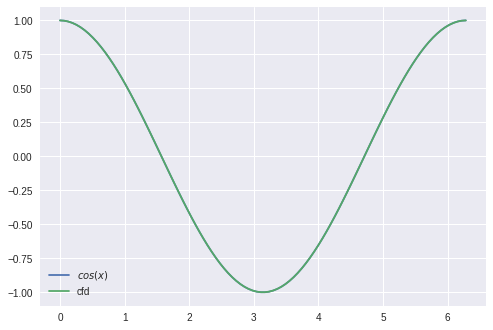

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def cfd(u, x, h):
    return (8*u(x+h/2)-8*u(x-h/2)-u(x+h)+u(x-h))/(6*h);
pass

h = .5 #step size
x_co = np.linspace(0, 2*np.pi, 100)
plt.plot(x_co,  np.cos(x_co), label = '$cos(x)$');
plt.plot(x_co, cfd(np.sin, x_co, h), label = 'cfd');
plt.legend();

plot log-log chart for the demonstration of convergence rate, find convergence order using linear regression.

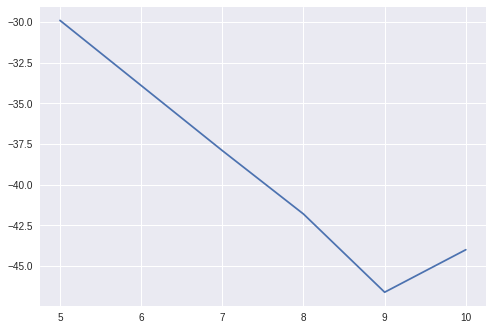

In [4]:

x_target = np.pi/3 #target point to be examined
y_target = np .cos(x_target) #exact derivative value at the target point
nn = np.arange(5, 11)
hh = 1/np.power(2, nn) #step sizes to be taken
err = cfd(np.sin, x_target, hh) - y_target #errors corresponding to each step size
yy = np.log2(np.abs(err))
plt.plot(nn, yy)


In [5]:
import scipy.stats as ss
out = ss.linregress(nn,yy)
print('----->>>the convergence order is ' + str(-out[0]))

----->>>the convergence order is 3.2128400623989086
